# La face cachée des tables de multiplication

L'objectif de cette serie d'exercices est d'écrire une fonction qui dessine la table de multiplication par $n$ modulo $m$ dans le [cercle trigonométrique](https://fr.wikipedia.org/wiki/Cercle_trigonom%C3%A9trique).

Pas de panique, nous allons procéder étape par étape. Lisez bien toutes les consignes.

## 1. La table de multiplication par $n$ modulo $m$.

La table de multiplication de $n$ modulo $m$ est donnée par la liste suivante :
$$T_{n,m}=\left[ 0, n \pmod{m},~2n \pmod{m},~3n \pmod{m},\ldots,~(m-1)n \pmod{m}\right].$$

**Exercice 1.1:** Implémenter la fonction `multiplication_modulo` qui étant donné trois entiers $k$, $n>0$ et $m>0$ renvoie l'entier ${j=k \times n \pmod{m}}$. 

In [1]:
def multiplication_modulo(k, n, m):
    return (k * n) % m

**Exercice 1.2:** Écrire la fonction `table_multiplication` telle que `table_multiplication(n,m)`renvoie $T_{n,m}$ la table de multiplication par $n$ modulo $m$ de type `list[int]`. **Consigne:** utiliser la fonction 'multiplication_modulo'. Voici un exemple de résultat attendu:
```
 >>> table_multiplication(2,5)
 [0, 2, 4, 1, 3]
 
 >>> table_multiplication(3,7)
 [0, 3, 6, 2, 5, 1, 4]
```

In [2]:
def table_multiplication(n, m):
    return [multiplication_modulo(k, n, m) for k in range(m)]

table_multiplication(2, 5)

[0, 2, 4, 1, 3]

## 2. Cercle trigonométrique

Considérons un **cercle trigonométrique** ayant pour d'origine le point $O=(0,0)$. 

Le rayon d'un cercle trigonométrique est égal à 1, ainsi chaque point $P$ sur le cercle est à une distance 1 de l'origine (la taille du segment $[OP]$ vaut 1. 

Si l'angle $\hat{COP}$ a pour valeur $\alpha$ avec $\alpha \in [0, 2\pi[$ (mesure en radians) alors le point $P$ a pour coordonnée $(\sin(\alpha),\cos(\alpha))$ ($\hat{COP}=\alpha$ et  $P=(\sin(\alpha),\cos(\alpha)$). On effectue un tour de cercle complet en ajoutant $2\pi$ radians à la valueur de tout angle, ainsi pour diviser un cercle en $m$ parts égales il suffit donc de considérer les angles $\frac{k\times2\pi}{m}$ pour ${k=0,1,\ldots,(m-1)}$.

On représentera un **point** $P=(x,y)$ du plan par le tuple `(x,y)` (de type `tuple[float,float]`). On représentera une **ligne** entre deux points $P_1=(x_1,y_1)$ et $P_2=(x_2,y_2)$ par le tuple `(x1,y1,x2,y2)` (de type `tuple[float, float, float ,float]`).

**Exercice 2.1:** Implémenter la fonction `est_sur_le_cercle` qui prend en entrée un **point** et retourne `True` s'il s'agit d'un point appartenant au cercle et `False` sinon. **Consigne:** soit $P$ un point ayant pour coordonnées $P=(x,y)$, verifier que ${-1 \leq x,y \leq 1}$. On considerera que $P$ est sur le cercle de rayon 1 si ${0.999 \leq x^2+y^2 \leq 1.001}$ (pour éviter les erreurs d'arrondis).

In [3]:
def est_sur_le_cercle(point):
    
    x, y = point
    
    if -1 <= x <= 1 or -1 <= y <= 1:
        return 0 <= x**2 + y**2 <= 1
    
    return False

**Exercice 2.2:** Implémenter la fonction `point_cercle_numero` telle que `point_cercle_numero(k,m)` retourne le $k$-ème point du cercle modulo $m$, c'est-à-dire les coordonnée du point $P$ tel que $\hat{COP}=\frac{k \times 2\pi}{m}$. Par exemple:
```
>> point_cercle_numero(1,8)
(0.7071067811865476, 0.7071067811865475)
 
 >>>  point_cercle_numero(5,8)
(-0.7071067811865477, -0.7071067811865475)
```
**Indication:** Commencer par calculer l'angle qui correspond au point demandé. Le module \texttt{math} contient les fonctions `\sin` et `\cos` et la valeur `pi`.

In [4]:
import math

def point_cercle_numero(k, m):
    
    alpha = k * 2 * math.pi / m
    
    return (math.sin(alpha), math.cos(alpha))

point_cercle_numero(1,8)

(0.7071067811865475, 0.7071067811865476)

**Exercice 2.3:** Soient $k$ et $j$ deux nombres tels que ${0 \leq k,j \leq m-1}$ et $k \neq j$. Donner une définition la fonction `ligne_points` telle que `ligne_points(k, j, m)` renvoie les coordonnées de la ligne entre les $k$-ème et $j$-ème points du cercle modulo $m$. Par exemple:
```
>>> ligne_points(1,6,8)
(0.7071067811865475, 0.7071067811865476, -1.0, -1.8369701987210297e-16)
```

In [5]:
def ligne_points(k, j, m):
    
    x_1, y_1 = point_cercle_numero(k, m)
    x_2, y_2 = point_cercle_numero(j, m)
    
    return (x_1, y_1, x_2, y_2)

ligne_points(1, 6, 8)    

(0.7071067811865475, 0.7071067811865476, -1.0, -1.8369701987210297e-16)

## 3. Table de multiplication et cercle trigonométrique

On cherche maintenant à dessiner la table de multiplication de $n$ modulo $m$. Il s'agit du cercle trigonométrique dans lequel pour chaque $k \in \{0,1,\ldots,m-1\}$, on a tracé une ligne qui relie le $k$-ieme point au point numéro $j=T_{n,m}[k]$. Par exemple pour $n=2$ et $m=8$, la table de $2$ modulo $8$ est la suivante : ${T_{2,8}=[0, 2, 4, 6, 0, 2, 4, 6]}$ (**Exercice 1.2**).

Une **ligne du cercle de la table de $n$ modulo $m$** est une ligne $(x_1,y_1,x_2,y_2)$ telle que:
- $P=(x_1,y_1)$ est le $k$-ème point du cercle modulo $m$,
- $Q=(x_2,y_2)$ est le $j$-ème point du cercle modulo $m$,
- $j = k \times n \pmod{m}$ (i.e. $j=T_{n,m}[k]$),
- $j \neq k $.


**Exercice 3.1:** Donner une définition la fonction `liste_lignes` telle que `liste_lignes(n,m)` renvoie la liste qui contient `les lignes du cercle de la table de $n$ modulo $m$`. Par exemple, pour la table de $2$ modulo $8$ on peut construire 7 lignes.**Consigne:** faire appel aux fonctions  `table_multiplication` et `ligne_points`. Voici un exemple du résultat attendu:
```
 >>> liste_lignes(3,5)
[(0.9510565162951535,
  0.30901699437494745,
  -0.587785252292473,
  -0.8090169943749476),
 (0.5877852522924732,
  -0.8090169943749473,
  0.9510565162951535,
  0.30901699437494745),
 (-0.587785252292473,
  -0.8090169943749476,
  -0.9510565162951536,
  0.30901699437494723),
 (-0.9510565162951536,
  0.30901699437494723,
  0.5877852522924732,
  -0.8090169943749473)]
```

In [6]:
def liste_lignes(n, m):
    
    res = list()
    t_mult = table_multiplication(n, m)
    for k in range(m):
        
        j = t_mult[k]
        
        if k != j:
            ligne = ligne_points(k, j, m)
            res.append(ligne)
    
    return res

liste_lignes(3, 5)

[(0.9510565162951535,
  0.30901699437494745,
  -0.587785252292473,
  -0.8090169943749476),
 (0.5877852522924732,
  -0.8090169943749473,
  0.9510565162951535,
  0.30901699437494745),
 (-0.587785252292473,
  -0.8090169943749476,
  -0.9510565162951536,
  0.30901699437494723),
 (-0.9510565162951536,
  0.30901699437494723,
  0.5877852522924732,
  -0.8090169943749473)]

**Exercice 3:** Écrire la définition de la fonction `dessin_table` telle que `dessin_table(n,m)` dessine la table de multiplication de $n$ modulo $m$. **Indication:** La fonction `plot` du module `matplotlib.pyplot`permet de tracer des lignes.

In [7]:
import matplotlib.pyplot as plt

def dessin_table(n,mod):
    
    l_lignes = liste_lignes(n,mod)
    for ligne in l_lignes:
        x1,y1,x2,y2 = ligne
        plt.plot([x1,x2],[y1,y2], color='black')

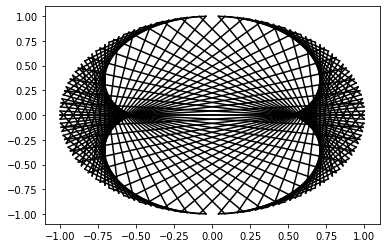

In [8]:
dessin_table(51,152)

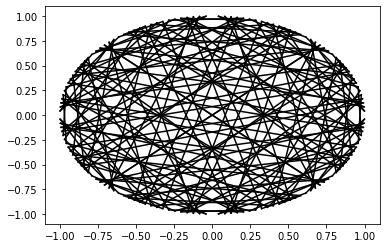

In [9]:
dessin_table(21,152)

## Références

- https://www.youtube.com/watch?v=-X49VQgi86E
- https://www.geogebra.org/m/ppSs89Xf